In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_df = pd.read_csv(r'C:\Users\admin\Desktop\Internship Work\Data\final_customer_churn_data.csv')

In [25]:
final_df.head()

,CustomerID,InvoiceNo,Quantity,TotalAmount,StockCode,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Churn
0,12346.0,2,0,0.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
1,12347.0,7,2458,4310.00,103,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,12348.0,4,2341,1797.24,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,12349.0,1,631,1757.55,73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,12350.0,1,197,334.40,17,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [27]:
features = final_df[['InvoiceNo', 'Quantity', 'TotalAmount', 'StockCode']]

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [33]:
from sklearn.cluster import KMeans

In [35]:
#CLustering of segments of buyers
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(features_scaled)

In [37]:
#Cluster Summary
final_df.groupby('Cluster')[['InvoiceNo', 'Quantity', 'TotalAmount', 'StockCode']].mean()

,InvoiceNo,Quantity,TotalAmount,StockCode
Cluster,,,,
0,3.122342,530.894723,865.709689,39.975322
1,96.071429,63508.928571,110488.785000,720.142857
2,16.306011,3634.945355,6294.598579,191.743169


In [41]:
cluster_names = {
    0: 'Mid Value',
    1: 'High Value',
    2: 'Low Value'
}
final_df['ClusterName'] = final_df['Cluster'].map(cluster_names)

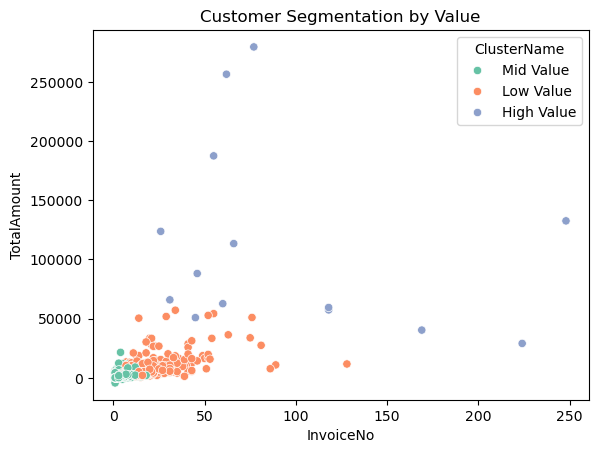

In [43]:
sns.scatterplot(x='InvoiceNo', y='TotalAmount', hue='ClusterName', data=final_df, palette='Set2')
plt.title('Customer Segmentation by Value')
plt.show()

In [45]:
# Reloading original ecommerce data to check product sales
df = pd.read_csv(r'C:\Users\admin\Desktop\Internship Work\Data\E-Commerce dataset.csv', encoding='ISO-8859-1')

In [47]:
# Drop missing CustomerID rows to match processed data
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

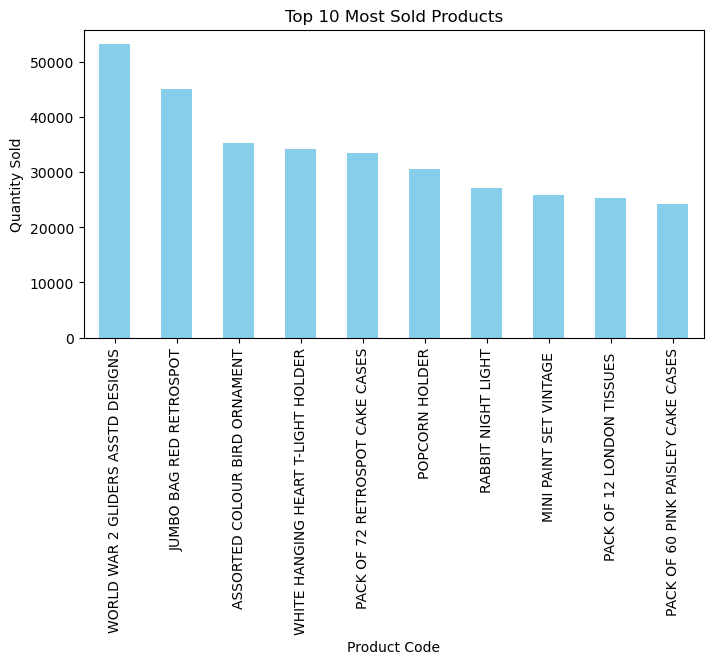

In [51]:
#Top 10 most sold items
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Code')
plt.ylabel('Quantity Sold')
plt.show()

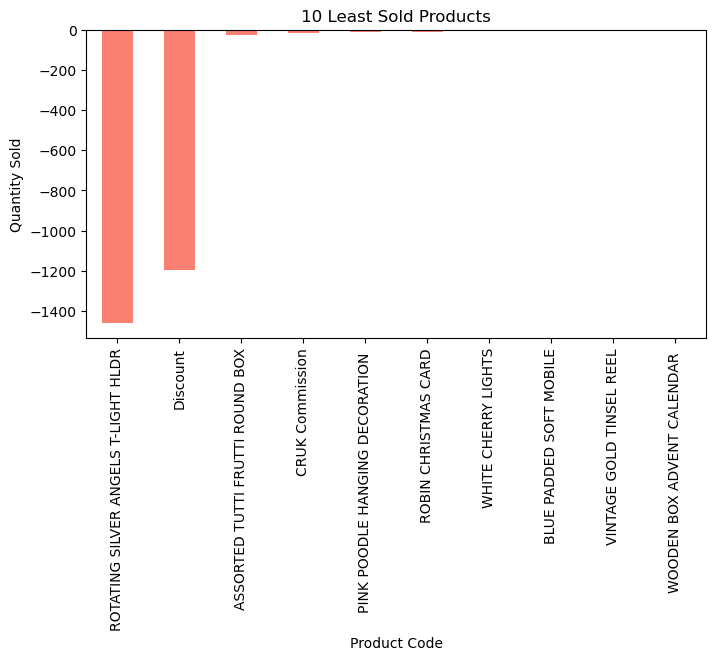

In [55]:
#Top 10 least Sold item
bottom_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(8,4))
bottom_products.plot(kind='bar', color='salmon')
plt.title('10 Least Sold Products')
plt.xlabel('Product Code')
plt.ylabel('Quantity Sold')
plt.show()